# Analyzing the Wine Quality Dataset






In this analysis, I will perform exploratory data analysis (EDA) to uncover insights and address any challenges or issues within the dataset.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

### Loading Dataset using pandas 

In [2]:
wine = pd.read_csv("week2-wine.csv", index_col = False)

In [121]:
wine.shape

(1599, 12)

 Our data has 1,599 rows and 12 columns.

In [5]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Checking Null values

In [6]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In our data, there is no null values

In [7]:
wine['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

# Data Analysis

In [81]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,residual sugar_log,quality_log,sulphates_log,total sulfur dioxide_log,chlorides_log,free sulfur dioxide_log,predicted_quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.477910,0.850232,1.718759,-0.445260,3.600721,-2.505462,2.546132,0.477910
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.058745,0.357443,0.145548,0.223566,0.705393,0.327215,0.685292,0.058745
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.335968,-0.105361,1.098612,-1.108663,1.791759,-4.422849,0.000000,0.335968
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.439893,0.641854,1.609438,-0.597837,3.091042,-2.659260,1.945910,0.439893
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,0.473193,0.788457,1.791759,-0.478036,3.637586,-2.538307,2.639057,0.473193
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,0.511004,0.955511,1.791759,-0.314711,4.127134,-2.407946,3.044522,0.511004
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,0.822389,2.740840,2.079442,0.693147,5.666427,-0.492658,4.276666,0.822389


From table, we can see that there are total **1599** dataset. Above we see mean, standard deviation, minimum, and three percentile(**25%, 50 and 75%** ). Here **25%** of fixed acidity means **25%** of our data is below 7.1000. Similarly **50%**  of fixed acidity is less than 7.0000 and son on.

### Data visualization

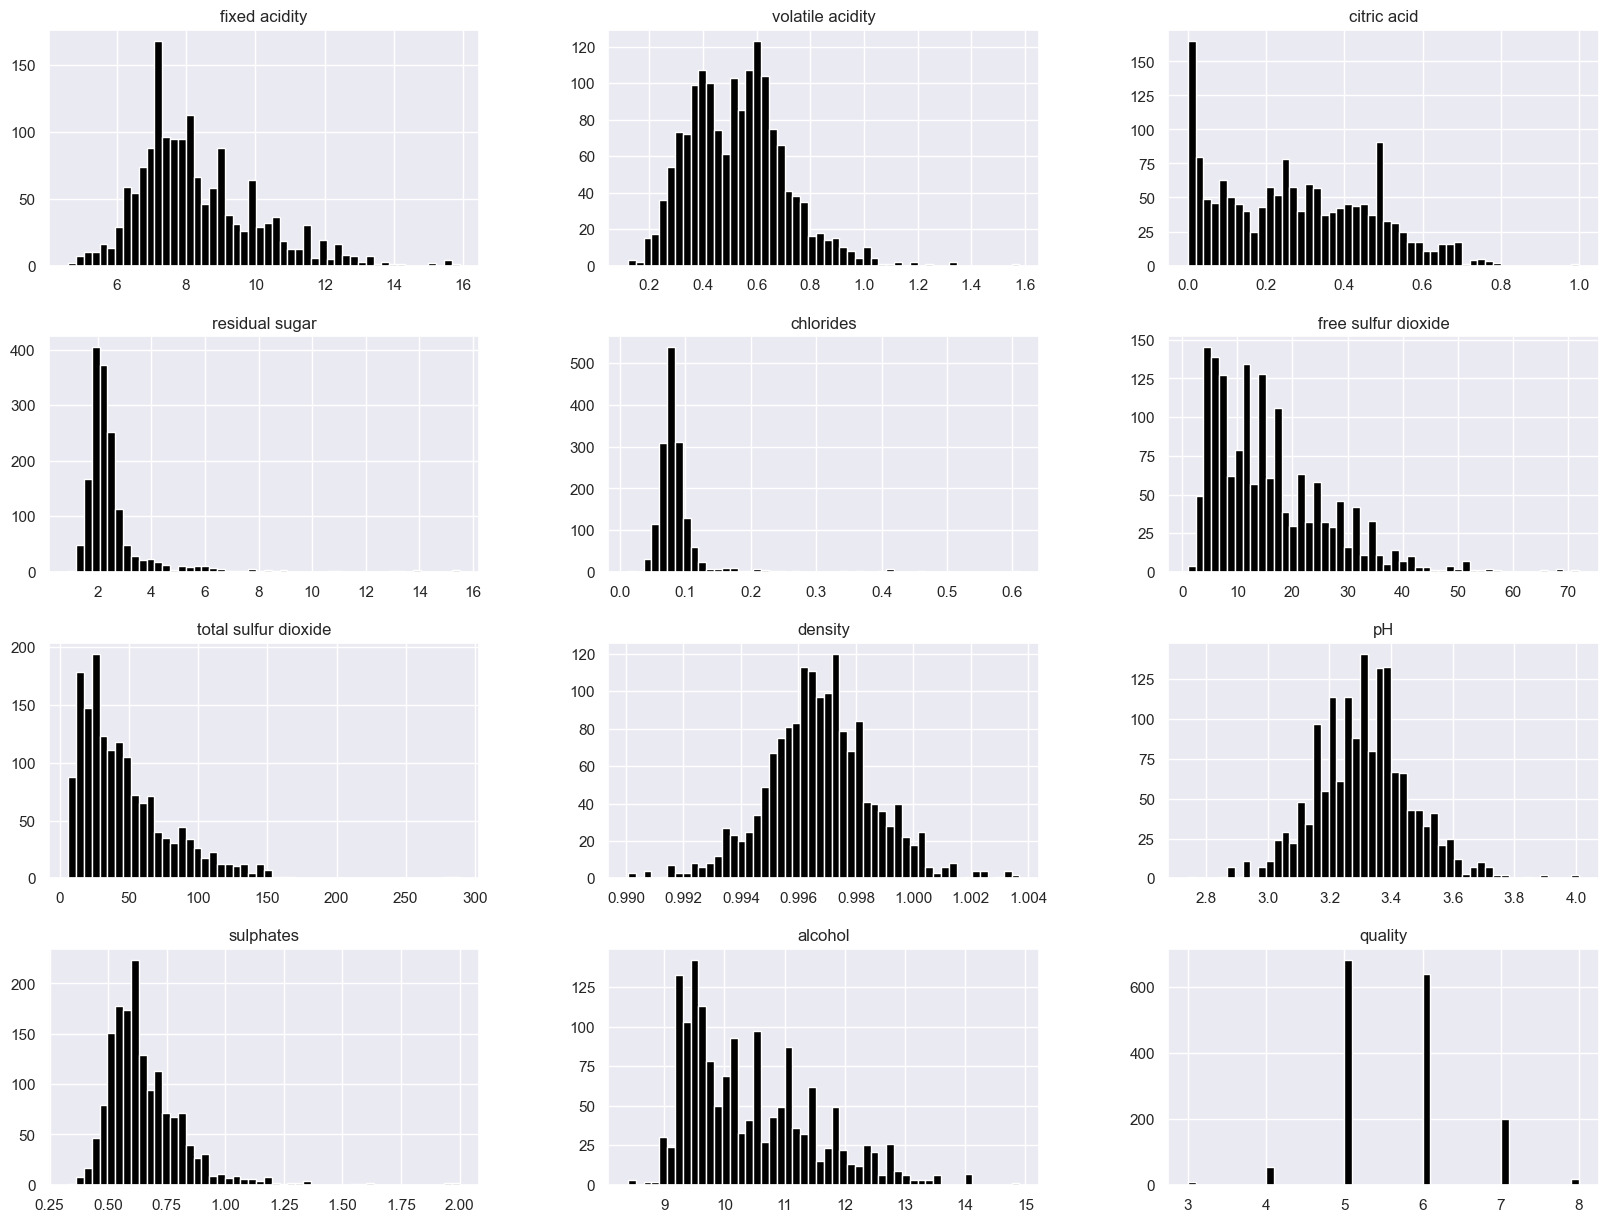

In [9]:
wine.hist(bins = 50, color = 'black',figsize = (20,15))
plt.show()

### standardization

In [10]:
def log_transform(data, col):
    for colname in col:
        # Check for zero or negative values in the column
        if (data[colname] <= 0).any():
            # Apply log transformation with a shift for non-positive values
            data[colname + '_log'] = np.log(data[colname] + 1)
        else:
            # Apply standard log transformation
            data[colname + '_log'] = np.log(data[colname])

In [11]:

log_transform(wine,['residual sugar','quality','sulphates','total sulfur dioxide', 'chlorides','free sulfur dioxide'])

In [12]:

wine_transform = wine
#saving the data set for future use
wine_transform.to_csv("wine_transfrom.csv")

C:\Users\SWETA\AppData\Local\Temp\ipykernel_16044\3848686860.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wine_transform["residual sugar"], axlabel="residual sugar");


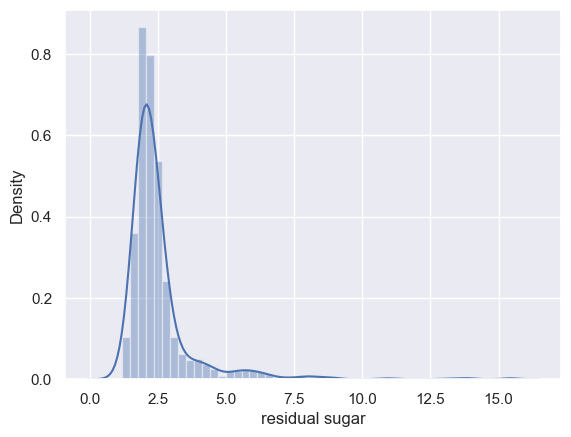

In [13]:
plt.close()
sns.distplot(wine_transform["residual sugar"], axlabel="residual sugar");


C:\Users\SWETA\AppData\Local\Temp\ipykernel_16044\124040757.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wine_transform["chlorides"], axlabel="chlorides");


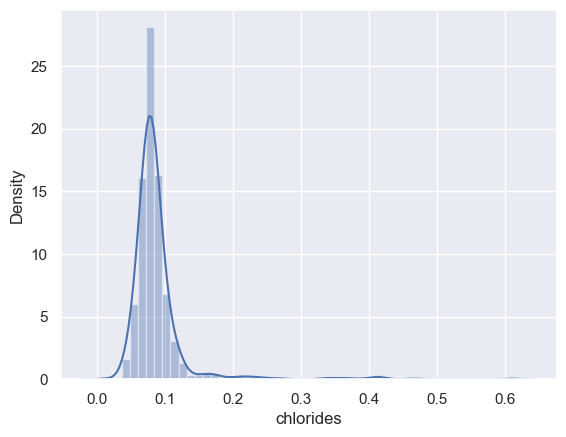

In [14]:
plt.close()
sns.distplot(wine_transform["chlorides"], axlabel="chlorides");

# Correlation

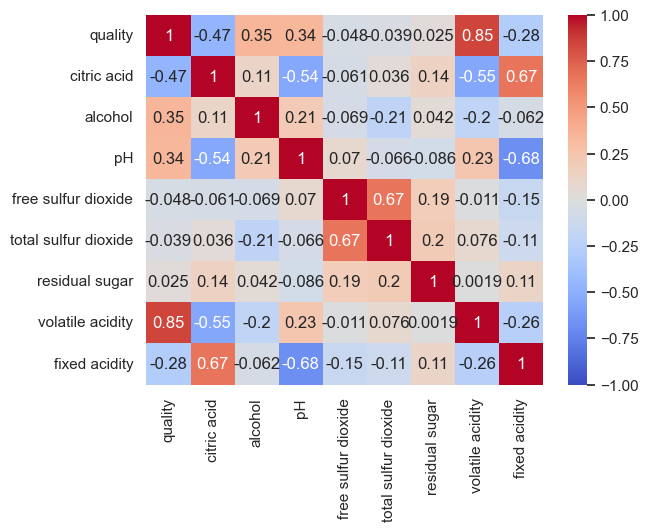

In [82]:
# Close any existing plots
plt.close()

# Create a heatmap of the correlation matrix for the selected columns
sns.heatmap(
    wine[['quality', 'citric acid',  'alcohol', 'pH', 'free sulfur dioxide', 'total sulfur dioxide', 
          'residual sugar', 'volatile acidity', 'fixed acidity']].corr(),  # Compute correlation matrix
    annot=True,  # Annotate each cell with the correlation coefficient
    vmin=-1,  # Minimum value of the color scale
    vmax=1,  # Maximum value of the color scale
    cmap='coolwarm'  # Color map to use
)

# Show the plot
plt.show()

From the heatmap, we can see that, **alcohol and quality** has strong postive correlation(i.e. 0.48) and  **volatile aciditiy and quality** has strong negative correlation (i.e -0.39)

### Defining dependent and independent variable

In [122]:
x = wine[['alcohol', 'volatile acidity']]
y = wine['quality']

In [123]:
reg = LinearRegression()
reg.fit(x,y)

LinearRegression()

In [124]:
reg.coef_

array([ 0.31381252, -1.38363571])

In [125]:
reg.intercept_

3.0954712729517824

In [126]:
reg.coef_

array([ 0.31381252, -1.38363571])

In [127]:
reg.intercept_

3.0954712729517824

In [128]:

wine['predicted_quality'] = reg.intercept_ + (reg.coef_[0] * wine['alcohol']) + (reg.coef_[1] * wine['volatile acidity'])

In [129]:
print(wine[['alcohol', 'volatile acidity', 'quality', 'predicted_quality']].head())

   alcohol  volatile acidity  quality  predicted_quality
0      9.4              0.70        5           5.076764
1      9.8              0.88        5           4.953235
2      9.8              0.76        5           5.119271
3      9.8              0.28        6           5.783416
4      9.4              0.70        5           5.076764


## Summary

First of all, I loaded dataset successfully, and found there is no missing values. Then I perform basic statistics to understand the data. In the Exploratory Data Analysis (EDA) process, I calculated summary statistics and visualizing data through histograms, correlation heatmap to uncover patterns and relationships among features. Then, I found alchol and volatile acidity has strong corelation with Quality. In preprocessing, I scaled features using log transform normalization.

In the analysis, I used a linear regression model from sklearn to predict the quality of wine based on the features alcohol and volatile acidity. The model coefficients were determined to be approximately 0.3138 for alcohol and -1.3836 for volatile acidity, with an intercept of 3.0955. BY using these coefficients, the predicted quality was calculated and added to the dataset. Therefore,a comparison of actual and predicted values showed reasonable alignment, demonstrating the model's performance in capturing the relationship between the input features and wine quality.